<a href="https://colab.research.google.com/github/nickfiddler/FiddlerCodingPortfolio/blob/main/MoviesSql83024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project demonstrates how SQL is used in python. I will be using basic skills, answering basic questions, and using only one table

Step one is going to be importing the file which is in a zip file. When I have the zip file, I am going to need to extract the csv file from it.

In [1]:
from google.colab import files
file = files.upload()

Saving archive.zip to archive.zip


In [2]:
import zipfile
import os

zip_file = 'archive.zip'
with zipfile.ZipFile(zip_file,'r') as zip_ref:
  zip_ref.extractall('extractedfiles')

print(os.listdir('extractedfiles'))

['imdb_top_1000.csv']


In [3]:
import pandas as pd

moviedf = pd.read_csv('extractedfiles/imdb_top_1000.csv')
moviedf.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


The file is currently in a database which would be good for python, but not for SQL. I am going to convert this file into a file I can use with SQL Coding

In [4]:
import sqlite3

conn = sqlite3.connect('movies.db')
moviedf.to_sql('movies', conn, if_exists='replace',index = False)

1000

Use basic query to check to see the SQL table

In [5]:
basicquery = 'SELECT * FROM movies'
basicsql = pd.read_sql_query(basicquery, conn)
basicsql

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,None
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,None
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,None,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,None


Because the SQL Table is retrieved from kaggle, I am going to check to see the values of the tables and make sure that each one is the correct value. I am going to leave values that are NA because 0 would be not an acurate representation of it

In [6]:
cursor = conn.execute('PRAGMA table_info(movies)')

for row in cursor.fetchall():
  print(row)

(0, 'Poster_Link', 'TEXT', 0, None, 0)
(1, 'Series_Title', 'TEXT', 0, None, 0)
(2, 'Released_Year', 'TEXT', 0, None, 0)
(3, 'Certificate', 'TEXT', 0, None, 0)
(4, 'Runtime', 'TEXT', 0, None, 0)
(5, 'Genre', 'TEXT', 0, None, 0)
(6, 'IMDB_Rating', 'REAL', 0, None, 0)
(7, 'Overview', 'TEXT', 0, None, 0)
(8, 'Meta_score', 'REAL', 0, None, 0)
(9, 'Director', 'TEXT', 0, None, 0)
(10, 'Star1', 'TEXT', 0, None, 0)
(11, 'Star2', 'TEXT', 0, None, 0)
(12, 'Star3', 'TEXT', 0, None, 0)
(13, 'Star4', 'TEXT', 0, None, 0)
(14, 'No_of_Votes', 'INTEGER', 0, None, 0)
(15, 'Gross', 'TEXT', 0, None, 0)


I am going to change the Released_Year, Runtime, and Gross column from text to int renaming them year, Run_Time, and gross. I will begin by adding a columns to the current table and switching from text to int.

In [7]:
cursor.execute('ALTER TABLE movies ADD COLUMN year INT')
conn.commit()

In [8]:
cursor.execute('UPDATE movies SET year = CAST(Released_Year AS INT)')
conn.commit()

In [9]:
cursor.execute('ALTER TABLE movies ADD COLUMN grossing INT')
conn.commit()

In [10]:
cursor.execute("UPDATE movies SET grossing = CAST(REPLACE(GROSS,',','') AS INT)")
conn.commit()

In [11]:
cursor.execute('ALTER TABLE movies ADD COLUMN Run_Time INT')
conn.commit()

In [12]:
cursor.execute("UPDATE movies SET Run_Time = CAST(REPLACE(Runtime,' min','') AS INT)")
conn.commit()

In case of a mistake in the next step, I have the ability to drop the table at the push of a button.

In [13]:
#cursor.execute('DROP TABLE movies_old')
#conn.commit()

In [14]:
#cursor.execute('DROP TABLE movies')
#conn.commit()

The next step is creating a new table without the old, unwanted columns. The first thing I will do is change the name of the current table to movies_old. Then I will create a new table (movies) with the columns I want. I will then fill in the new table with the vlaues from the old table and check it.

In [15]:
cursor.execute('ALTER TABLE movies RENAME TO movies_old')

In [16]:
cursor.execute('''
Create TABLE movies(
  Poster_Link TEXT,
  Series_Title TEXT,
  year INT,
  Certificate TEXT,
  Run_Time INT,
  Genre TEXT,
  IMDB_Rating REAL,
  Overview TEXT,
  Meta_Score REAL,
  Director TEXT,
  Star1 TEXT,
  Star2 TEXT,
  Star3 TEXT,
  Star4 TEXT,
  No_of_Votes INT,
  grossing INT
)
''')

cursor.execute('''
INSERT INTO movies (Poster_Link, Series_Title, year, Certificate, Run_Time, Genre, IMDB_Rating, Overview,
Meta_Score, Director, Star1, Star2, Star3, Star4, No_of_Votes, grossing)
SELECT Poster_Link, Series_Title, year, Certificate, Run_Time, Genre, IMDB_Rating, Overview,
Meta_Score, Director, Star1, Star2, Star3, Star4, No_of_Votes, grossing FROM movies_old
''')

cursor.execute('DROP TABLE movies_old')
conn.commit()

pd.read_sql_query('SELECT * FROM movies',conn)

,Poster_Link,Series_Title,year,Certificate,Run_Time,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,No_of_Votes,grossing
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,None,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


The next part of the project will be demonstrating simple queries that I can do with SQL. The first query will be where, showing the whole table for all of the movies directed by Christopher Nolan

In [17]:
simple1 = "SELECT * from movies WHERE Director = 'Christopher Nolan'"
pd.read_sql_query(simple1, conn)

,Poster_Link,Series_Title,year,Certificate,Run_Time,Genre,IMDB_Rating,Overview,Meta_Score,Director,Star1,Star2,Star3,Star4,No_of_Votes,grossing
0,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
1,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
2,https://m.media-amazon.com/images/M/MV5BZjdkOT...,Interstellar,2014,UA,169,"Adventure, Drama, Sci-Fi",8.6,A team of explorers travel through a wormhole ...,74.0,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017
3,https://m.media-amazon.com/images/M/MV5BMjA4ND...,The Prestige,2006,U,130,"Drama, Mystery, Sci-Fi",8.5,"After a tragic accident, two stage magicians e...",66.0,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,53089891
4,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099
5,https://m.media-amazon.com/images/M/MV5BZTcyNj...,Memento,2000,UA,113,"Mystery, Thriller",8.4,A man with short-term memory loss attempts to ...,80.0,Christopher Nolan,Guy Pearce,Carrie-Anne Moss,Joe Pantoliano,Mark Boone Junior,1125712,25544867
6,https://m.media-amazon.com/images/M/MV5BOTY4Yj...,Batman Begins,2005,UA,140,"Action, Adventure",8.2,"After training with his mentor, Batman begins ...",70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,206852432
7,https://m.media-amazon.com/images/M/MV5BN2YyZj...,Dunkirk,2017,UA,106,"Action, Drama, History",7.8,"Allied soldiers from Belgium, the British Empi...",94.0,Christopher Nolan,Fionn Whitehead,Barry Keoghan,Mark Rylance,Tom Hardy,555092,188373161


Order by

In [18]:
simple2 = "SELECT Series_Title, IMDB_Rating FROM movies ORDER BY IMDB_Rating"
pd.read_sql_query(simple2, conn)

,Series_Title,IMDB_Rating
0,Dark Waters,7.6
1,Searching,7.6
2,Once Upon a Time... in Hollywood,7.6
3,Nelyubov,7.6
4,The Florida Project,7.6
...,...,...
995,The Dark Knight,9.0
996,The Godfather: Part II,9.0
997,12 Angry Men,9.0
998,The Godfather,9.2


AND

In [19]:
simple3 = "SELECT Series_Title, year, Meta_Score FROM movies WHERE year < 2000 AND Meta_Score > 80"
pd.read_sql_query(simple3, conn)

,Series_Title,year,Meta_Score
0,The Godfather,1972,100.0
1,The Godfather: Part II,1974,90.0
2,12 Angry Men,1957,96.0
3,Pulp Fiction,1994,94.0
4,Schindler's List,1993,94.0
...,...,...,...
218,Blowup,1966,82.0
219,A Hard Day's Night,1964,96.0
220,Giant,1956,84.0
221,From Here to Eternity,1953,85.0


OR

In [20]:
simple4 = "SELECT Series_Title, Director, Star1 FROM movies WHERE Director ='Christopher Nolan' OR Star1 = 'Christian Bale'"
pd.read_sql_query(simple4, conn)

,Series_Title,Director,Star1
0,The Dark Knight,Christopher Nolan,Christian Bale
1,Inception,Christopher Nolan,Leonardo DiCaprio
2,Interstellar,Christopher Nolan,Matthew McConaughey
3,The Prestige,Christopher Nolan,Christian Bale
4,The Dark Knight Rises,Christopher Nolan,Christian Bale
5,Memento,Christopher Nolan,Guy Pearce
6,Batman Begins,Christopher Nolan,Christian Bale
7,Dunkirk,Christopher Nolan,Fionn Whitehead
8,The Big Short,Adam McKay,Christian Bale
9,The Machinist,Brad Anderson,Christian Bale


Not

In [21]:
simple5 = "SELECT Series_Title, Genre FROM Movies WHERE NOT Genre = 'Action, Adventure'"
pd.read_sql_query(simple5,conn)

,Series_Title,Genre
0,The Shawshank Redemption,Drama
1,The Godfather,"Crime, Drama"
2,The Dark Knight,"Action, Crime, Drama"
3,The Godfather: Part II,"Crime, Drama"
4,12 Angry Men,"Crime, Drama"
...,...,...
990,Breakfast at Tiffany's,"Comedy, Drama, Romance"
991,Giant,"Drama, Western"
992,From Here to Eternity,"Drama, Romance, War"
993,Lifeboat,"Drama, War"


Limit

In [22]:
simple6 = "SELECT Series_Title, grossing FROM movies ORDER BY grossing DESC LIMIT 5"
pd.read_sql_query(simple6, conn)

,Series_Title,grossing
0,Star Wars: Episode VII - The Force Awakens,936662225
1,Avengers: Endgame,858373000
2,Avatar,760507625
3,Avengers: Infinity War,678815482
4,Titanic,659325379


Min

In [23]:
simple7 = "SELECT Series_Title, Min(No_of_Votes) FROM movies"
pd.read_sql_query(simple7,conn)

,Series_Title,Min(No_of_Votes)
0,Ba wang bie ji,25088


Max

In [24]:
simple8 = "SELECT Series_Title, Max(No_of_Votes) FROM movies"
pd.read_sql_query(simple8,conn)

,Series_Title,Max(No_of_Votes)
0,The Shawshank Redemption,2343110


AVG

In [25]:
simple9 = "SELECT AVG(grossing) as Average_Gross FROM movies"
pd.read_sql_query(simple9,conn)

,Average_Gross
0,6.803475e+07


Sum

In [26]:
simple10 = "SELECT SUM(Run_Time) as Sum_Runtime FROM movies"
pd.read_sql_query(simple10,conn)

,Sum_Runtime
0,122891


Count

In [27]:
simple11 = "SELECT COUNT(Star1) as Hugh_Jackman_Lead FROM movies WHERE Star1 = 'Hugh Jackman'"
pd.read_sql_query(simple11,conn)

,Hugh_Jackman_Lead
0,2


For the final part of this project, I will be using SQL Queries to answer common questions that could be asked about a table. The first question being: What are the most common movie genres?

In [28]:
q1 = "SELECT Genre, Count(*) as Count FROM movies GROUP BY Genre ORDER BY Count DESC"
pd.read_sql_query(q1, conn)

,Genre,Count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Action, Adventure, Horror",1
198,"Action, Adventure, History",1
199,"Action, Adventure, Family",1
200,"Action, Adventure, Crime",1


Who are the 5 directors with the most films in the dataset?

In [29]:
q2 = "Select Director, Count(*) as Count FROM movies GROUP BY Director ORDER BY Count Desc Limit 5"
pd.read_sql_query(q2,conn)

,Director,Count
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10


What actors have appeared in the most movies?

In [30]:
q3 = '''Select Actor, Count(*) as Appearances FROM(
SELECT Star1 AS Actor FROM movies
UNION ALL
SELECT Star2 AS Actor From movies
UNION ALL
SELECT Star3 AS Actor From movies
UNION ALL
SELECT Star4 AS Actor From movies
) AS Combined
GROUP BY Actor
ORDER BY Appearances Desc
Limit 10'''
pd.read_sql_query(q3, conn)

,Actor,Appearances
0,Robert De Niro,17
1,Tom Hanks,14
2,Al Pacino,13
3,Clint Eastwood,12
4,Brad Pitt,12
5,Matt Damon,11
6,Leonardo DiCaprio,11
7,Christian Bale,11
8,James Stewart,10
9,Scarlett Johansson,9


How has the number of realeses per year change overtime?

In [31]:
q4 = "SELECT year, COUNT(*) as YearCount FROM movies GROUP BY year ORDER BY year"
pd.read_sql_query(q4,conn)

,year,YearCount
0,0,1
1,1920,1
2,1921,1
3,1922,1
4,1924,1
...,...,...
95,2016,28
96,2017,22
97,2018,19
98,2019,23


How has the average grossing movie changed by year (Use a histogram)

In [32]:
q5 = "SELECT year, AVG(grossing) as Yearly_AVG_Gross FROM movies GROUP BY year ORDER BY Yearly_AVG_Gross"
histoxy = pd.read_sql_query(q5,conn)
histoxy.head()

,year,Yearly_AVG_Gross
0,1920,NaN
1,1922,NaN
2,1932,NaN
3,1943,NaN
4,2020,NaN


Histogram Coding

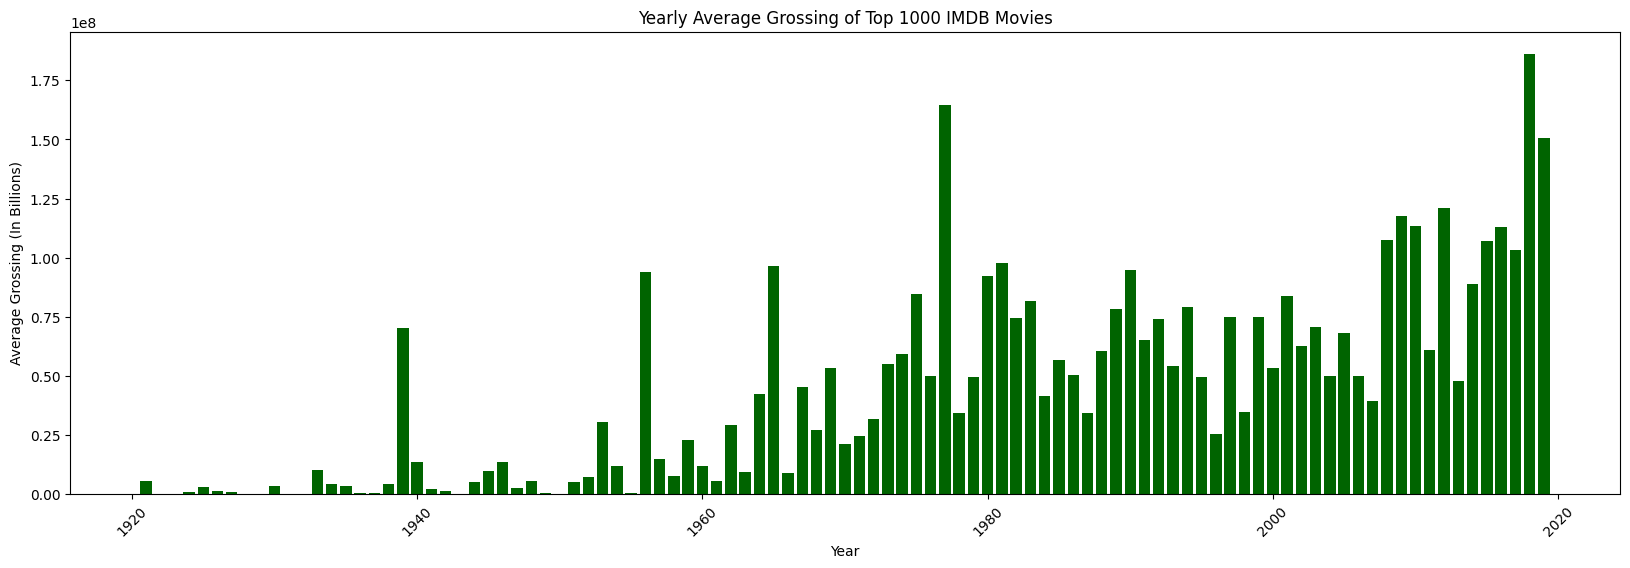

In [33]:
import matplotlib.pyplot as plt
histoxy = histoxy[histoxy['year']!=0]
plt.figure(figsize=(20,6))
plt.bar(histoxy['year'],histoxy['Yearly_AVG_Gross'], color='darkgreen')

plt.xlabel('Year')
plt.ylabel('Average Grossing (In Billions)')
plt.title("Yearly Average Grossing of Top 1000 IMDB Movies")

plt.xticks(rotation = 45)
plt.show()